In [4]:
from google.colab import files
uploaded = files.upload()

Saving bola de futebol.rar to bola de futebol.rar
Saving skate.rar to skate.rar
Saving bicicleta.rar to bicicleta.rar
Saving patins.rar to patins.rar


Configuração do Ambiente

In [9]:
!apt-get install unrar

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1).
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.


In [5]:
!unrar x skate.rar


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from skate.rar

Creating    skate                                                     OK
Extracting  skate/download (1).jpg                                         0%  OK 
Extracting  skate/download (2).jpg                                         0%  OK 
Extracting  skate/download (3).jpg                                         0%  OK 
Extracting  skate/download (4).jpg                                         0%  OK 
Extracting  skate/download (5).jpg                                         0%  OK 
Extracting  skate/download (6).jpg                                         0%  OK 
Extracting  skate/download (7).jpg                                         0%  OK 
Extracting  skate/download (8).jpg                                         0%  OK 
Extracting  skate/download (9).jpg                                         0%  

In [6]:
!unrar x bicicleta.rar


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from bicicleta.rar

Creating    bicicleta                                                 OK
Extracting  bicicleta/Image_1.jpg                                          3%  OK 
Extracting  bicicleta/Image_12.jpg                                         3%  OK 
Extracting  bicicleta/Image_13.jpg                                         5%  OK 
Extracting  bicicleta/Image_14.jpg                                         6%  OK 
Extracting  bicicleta/Image_15.jpg                                         7%  OK 
Extracting  bicicleta/Image_16.JPG                                         8%  OK 
Extracting  bicicleta/Image_17.jpg                                         9%  OK 
Extracting  bicicleta/Image_18.jpg                                        10%  OK 
Extracting  bicicleta/Image_19.jpg                                        12%

In [7]:
!unrar x patins.rar


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from patins.rar

Creating    patins                                                    OK
Extracting  patins/Image_1.jpg                                             3%  OK 
Extracting  patins/Image_10.jpg                                            4%  OK 
Extracting  patins/Image_11.jpg                                            4%  OK 
Extracting  patins/Image_12.jpg                                            5%  OK 
Extracting  patins/Image_13.jpg                                            6%  OK 
Extracting  patins/Image_14.jpg                                            8%  OK 
Extracting  patins/Image_18.png                                           10%  OK 
Extracting  patins/Image_19.png                                           17%  OK 
Extracting  patins/Image_2.jpg                                            19% 

In [8]:
!unrar x bola\ de\ futebol.rar


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from bola de futebol.rar

Creating    bola de futebol                                           OK
Extracting  bola de futebol/download (1).jpg                               0%  OK 
Extracting  bola de futebol/download (10).jpg                              0%  OK 
Extracting  bola de futebol/download (2).jpg                               0%  OK 
Extracting  bola de futebol/download (3).jpg                               0%  OK 
Extracting  bola de futebol/download.jpg                                   0%  OK 
Extracting  bola de futebol/images (1).jpg                                 1%  OK 
Extracting  bola de futebol/images.jpg                                     1%  OK 
Extracting  bola de futebol/Image_1.jpg                                    2%  OK 
Extracting  bola de futebol/Image_10.jpeg                                 

In [10]:
import os

# Criação dos diretórios
os.makedirs('/content/dataset/train/bicicleta', exist_ok=True)
os.makedirs('/content/dataset/train/skate', exist_ok=True)
os.makedirs('/content/dataset/train/patins', exist_ok=True)
os.makedirs('/content/dataset/train/bola_de_futebol', exist_ok=True)

os.makedirs('/content/dataset/validation/bicicleta', exist_ok=True)
os.makedirs('/content/dataset/validation/skate', exist_ok=True)
os.makedirs('/content/dataset/validation/patins', exist_ok=True)
os.makedirs('/content/dataset/validation/bola_de_futebol', exist_ok=True)

In [11]:
import os
import shutil

# Defina os diretórios
train_dir = '/content/dataset/train'
validation_dir = '/content/dataset/validation'

# Lista de classes
classes = ['bicicleta', 'skate', 'patins', 'bola_de_futebol']

# Mova 5 imagens de cada classe para a pasta de validação
for class_name in classes:
    # Crie o diretório de validação, se não existir
    os.makedirs(os.path.join(validation_dir, class_name), exist_ok=True)

    # Pegar todos os arquivos da classe correspondente
    class_path = os.path.join(train_dir, class_name)
    images = os.listdir(class_path)

    # Mover os primeiros 5 arquivos para a pasta de validação
    for img in images[:5]:  # Muda aqui para pegar até 5 imagens
        shutil.move(os.path.join(class_path, img), os.path.join(validation_dir, class_name, img))

print("Imagens movidas com sucesso!")

Imagens movidas com sucesso!


In [12]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Carregar o modelo MobileNetV2 pré-treinado (sem as camadas fully connected no topo)
base_model = MobileNetV2(input_shape=(150, 150, 3),  # Tamanho das imagens
                         include_top=False,         # Não incluir as camadas fully connected
                         weights='imagenet')        # Usar pesos pré-treinados na ImageNet

# Congelar o modelo base para não treinar suas camadas durante o primeiro treinamento
base_model.trainable = False

<ipython-input-12-a0ef19128073>:8: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=(150, 150, 3),  # Tamanho das imagens


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Preparar os Dados

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '/content/dataset/train'
validation_dir = '/content/dataset/validation'

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                              target_size=(150, 150),
                                                              batch_size=32,
                                                              class_mode='categorical')

Found 154 images belonging to 4 classes.
Found 20 images belonging to 4 classes.


Modelo e Treino

<ipython-input-29-39bd2e87426f>:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 5, 5, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         655,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,915,908 (11.12 MB)

 Trainable params: 2,881,796 (10.99 MB)

 Non-trainable params: 34,112 (133.25 KB)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 60s 5s/step - accuracy: 0.3661 - loss: 1.6492 - val_accuracy: 0.7500 - val_loss: 0.4513
Epoch 2/10
1/4 ━━━━━━━━━━━━━━━━━━━━ 14s 5s/step - accuracy: 0.7500 - loss: 0.6664

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 449ms/step - accuracy: 0.7500 - loss: 0.6664 - val_accuracy: 0.7500 - val_loss: 0.6474
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - accuracy: 0.8417 - loss: 0.4492 - val_accuracy: 0.7000 - val_loss: 1.6366
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 218ms/step - accuracy: 0.8438 - loss: 0.3500 - val_accuracy: 0.7000 - val_loss: 1.9794
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 32s 3s/step - accuracy: 0.8581 - loss: 0.2965 - val_accuracy: 0.7500 - val_loss: 1.9181
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 453ms/step - accuracy: 0.9375 - loss: 0.1412 - val_accuracy: 0.7500 - val_loss: 1.7848
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 17s 4s/step - accuracy: 0.9771 - loss: 0.1063 - val_accuracy: 0.7500 - val_loss: 2.2053
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 162ms/step - accuracy: 1.0000 - loss: 0.0522 - val_accuracy: 0.7500 - val_loss: 2.3450
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 4s/step - accuracy: 0.9269 - loss: 0.3102 - val_accuracy: 0.7000 - val_loss: 2.6628
Epoch 10/10

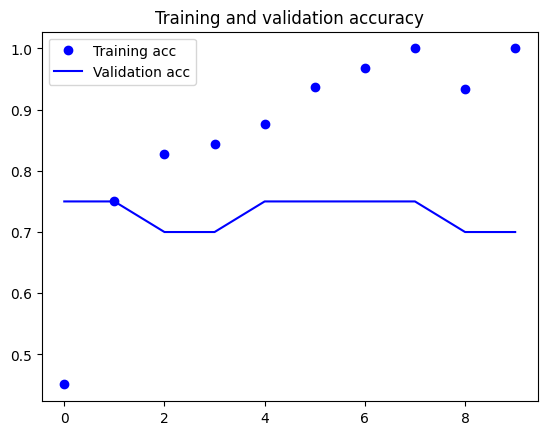

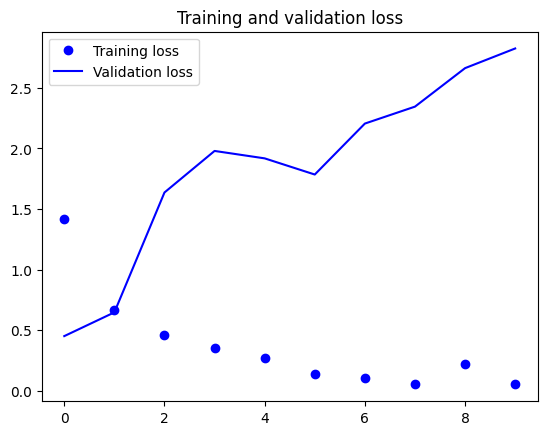

In [29]:
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2  # Exemplo de base model

# Passo 1: Definir o modelo base (MobileNetV2)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Passo 2: Criar o modelo completo
model = models.Sequential([
    base_model,  # Modelo base
    layers.GlobalAveragePooling2D(),  # Camada para reduzir a dimensionalidade
    layers.Dense(512, activation='relu'),  # Camada fully connected
    layers.Dropout(0.5),  # Dropout para evitar overfitting
    layers.Dense(4, activation='softmax')  # Camada de saída para 4 classes
])

# Passo 3: Compilar o modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Passo 4: Verificar a arquitetura do modelo
model.summary()

# Passo 5: Treinar o modelo e capturar o histórico
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // train_generator.batch_size,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // validation_generator.batch_size,
                    epochs=10)  # Ajuste o número de épocas conforme necessário

# Passo 6: Gerar gráficos de precisão e perda
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# Gráfico da Precisão
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

# Gráfico da Perda
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Fine-Tuning (Ajuste Fino)

In [30]:
# Descongelar algumas camadas do modelo base
base_model.trainable = True

# Congelar apenas as primeiras camadas (por exemplo, as 100 primeiras)
for layer in base_model.layers[:100]:
    layer.trainable = False

# Recompilar o modelo com uma taxa de aprendizado menor para o fine-tuning
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Treinar novamente o modelo (fine-tuning)
history_fine = model.fit(train_generator,
                         steps_per_epoch=100,
                         epochs=10,  # Número de épocas para o fine-tuning
                         validation_data=validation_generator,
                         validation_steps=50)

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 33s 117ms/step - accuracy: 0.8889 - loss: 0.3685 - val_accuracy: 0.7000 - val_loss: 2.6729
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 70ms/step - accuracy: 0.9419 - loss: 0.2060 - val_accuracy: 0.7000 - val_loss: 2.5820
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - accuracy: 0.9618 - loss: 0.1119 - val_accuracy: 0.7000 - val_loss: 2.5408
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - accuracy: 0.9539 - loss: 0.1009 - val_accuracy: 0.7000 - val_loss: 2.4988
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - accuracy: 0.9281 - loss: 0.1832 - val_accuracy: 0.7000 - val_loss: 2.4731
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 71ms/step - accuracy: 0.9019 - loss: 0.2494 - val_accuracy: 0.7000 - val_loss: 2.4463
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - accuracy: 0.9423 - loss: 0.2436 - val_accuracy: 0.7000 - val_loss: 2.4099
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - accuracy: 0.9411 - loss: 0.1501 - v

Avaliação e Visualização dos Resultados

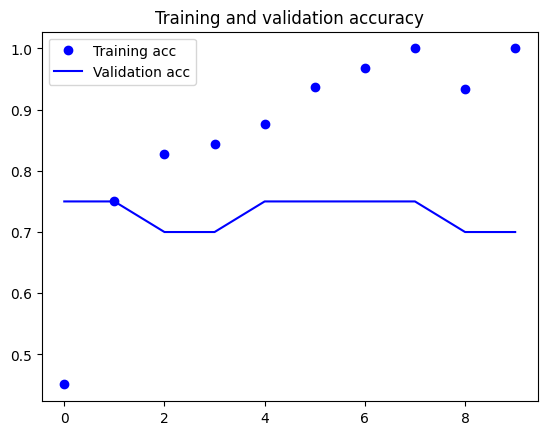

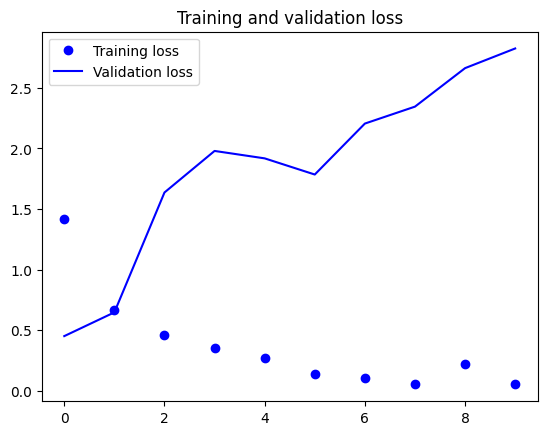

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Método de busca

Saving bicicletaVerde.jpg to bicicletaVerde (2).jpg
Imagem carregada: bicicletaVerde (2).jpg
Imagens semelhantes encontradas:


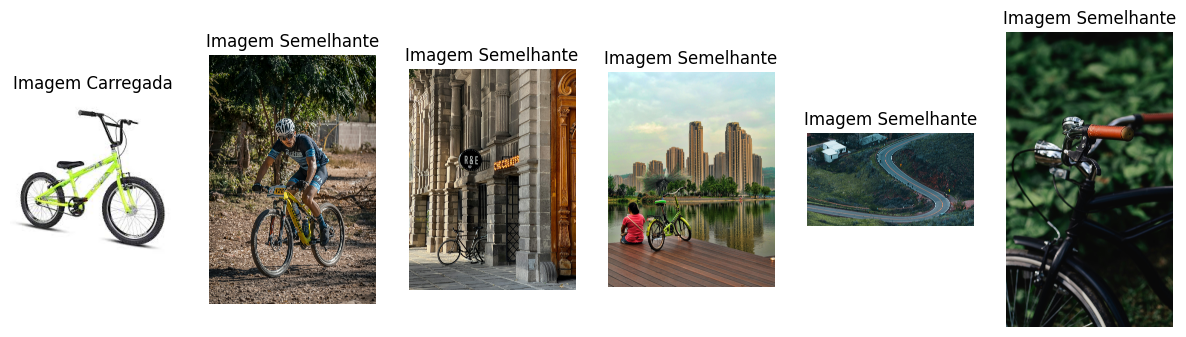

In [41]:
import requests
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
from google.colab import files

# Insira sua chave de API Pexels aqui
PEXELS_API_KEY = "BRuN9ZwWYaPG6nQPuHamOEX5qq6UMGxbrwFUbdXRBizFVXr7bdSBtw1L"

def search_images(query, per_page=5):
    headers = {
        "Authorization": PEXELS_API_KEY,
    }

    # URL de busca de imagens
    url = f"https://api.pexels.com/v1/search?query={query}&per_page={per_page}"

    response = requests.get(url, headers=headers)

    if response.status_code != 200:
        print(f"Error: {response.status_code}, {response.text}")
        return []

    return [photo["src"]["original"] for photo in response.json()["photos"]]

def display_images(original_image_url, similar_image_urls):
    plt.figure(figsize=(15, 10))

    # Exibir a imagem original
    plt.subplot(1, len(similar_image_urls) + 1, 1)
    original_image = Image.open(original_image_url)
    plt.imshow(original_image)
    plt.title("Imagem Carregada")
    plt.axis('off')

    # Exibir as imagens semelhantes
    for i, url in enumerate(similar_image_urls):
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        plt.subplot(1, len(similar_image_urls) + 1, i + 2)
        plt.imshow(img)
        plt.axis('off')
        plt.title("Imagem Semelhante")

    plt.show()

# Função principal para buscar e exibir imagens
def find_similar_images():
    # 1. Fazer upload da imagem
    uploaded = files.upload()  # Permite que o usuário faça upload de uma imagem

    for filename in uploaded.keys():
        print(f'Imagem carregada: {filename}')

        # 2. Buscar imagens semelhantes na internet usando a Pexels API
        query = "bicicleta"  # A consulta que estamos usando
        image_urls = search_images(query, per_page=5)  # Buscar imagens

        # 3. Exibir a imagem carregada e as imagens semelhantes
        print("Imagens semelhantes encontradas:")
        display_images(filename, image_urls)

# Executar a função
find_similar_images()